In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import scipy.optimize as sco
import scipy.constants as c
from scipy.optimize import curve_fit as cf
import pandas as pd

In [2]:
def indFit(wl,Eg,Omega,A,T=77):  #Omega [K]
    wl=wl*1e-9  #+ dipp*1e-9
    h_nu= c.h*c.c /wl /c.e
    return A *((h_nu - Eg + c.Boltzmann/c.e * Omega)**2/ ( np.exp(Omega / T) -1) + (h_nu - Eg - c.Boltzmann/c.e * Omega)**2/ ( 1- np.exp(-Omega / T) ))


#def indFit_E(E,Eg,Omega,A,T=77):
#    return A *((E - Eg + c.Boltzmann/c.e * Omega)**2/ ( np.exp(Omega / T) -1) + (E - Eg - c.Boltzmann/c.e * Omega)**2/ ( 1- np.exp(-Omega / T) ))

#def si(wl,Eg,Omega,A,T=77):
#    return A *((c.h*c.c /wl - Eg*c.e + c.Boltzmann * Omega)**2/ ( np.exp(Omega / T) -1) + (c.h*c.c /wl - Eg*c.e - c.Boltzmann * Omega)**2/ ( 1- np.exp(-Omega / T) ))

In [3]:
n=28
m=-11
#Bereich wählen, 500 I_0 sollte ca. da sein

data=pd.read_table("Data/RechtsN2.txt",skiprows=2)
wavelen=np.array(data.values[:,0])[n:m]
intens=np.array(data.values[:,1])[n:m]

energy=c.h/wavelen/c.e*1e9*c.c

intens = np.log(500/intens)  # # Zur alpha Berechnung, da wir alpha fitten
wavelen

array([ 960.,  980.,  990., 1000., 1010., 1015., 1020., 1025., 1030.])

[  1.12488466 184.75645848 121.68168951]


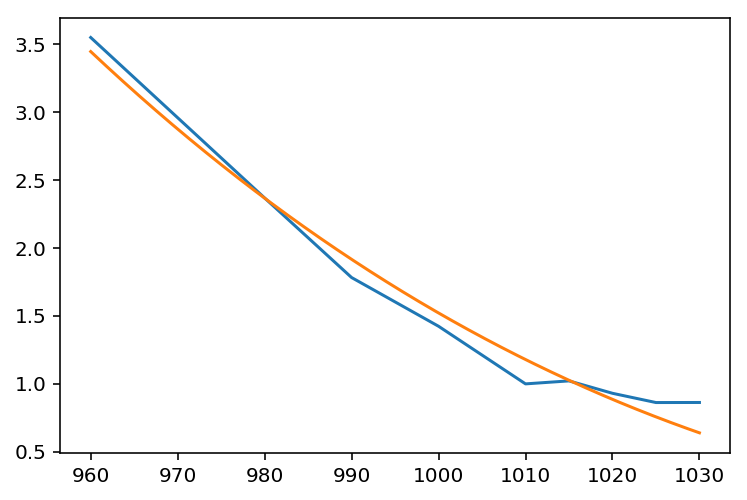

In [4]:
popt,pcov=cf(indFit, wavelen ,intens, p0=[1,500,200])
print(popt)
xrange=np.linspace(wavelen[0],wavelen[-1],1000)
fig,ax=plt.subplots(dpi=144)
ax.plot(wavelen,intens)
ax.plot(xrange, indFit(xrange,*popt))
#ax.plot(xrange, indFit_E(xrange, 1,500,200),color="red")

.
.
.
.
Es folgt: Bullshit

[   1.4  500.   200. ]


C:\Users\Gunther\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


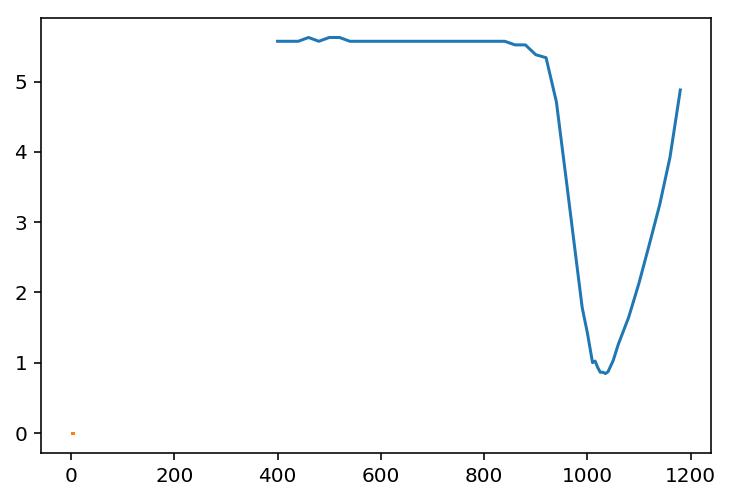

In [122]:
popt,pcov=cf(si, wavelen ,intens, p0=[1.4,500,200])
print(popt)
xrange=np.linspace(energy[0],energy[-1],1000)
fig,ax=plt.subplots(dpi=144)
ax.plot(wavelen,intens)
ax.plot(xrange, si(xrange,*popt))
#ax.plot(xrange, si(xrange, 1,500,200),color="red")

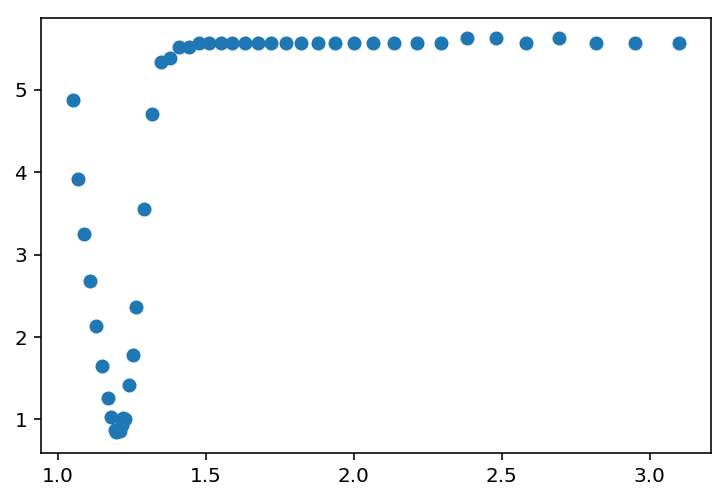

In [121]:
whole=np.linspace(400,1200,1000)
fig,ax=plt.subplots(dpi=144)
#ax.plot(whole,indFit(whole,1.4,.02,200))
ax.scatter(c.h/wavelen/c.e*1e9*c.c,intens)